# Прогноз восстановления золота

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Расчёт-эффективности" data-toc-modified-id="Расчёт-эффективности-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Расчёт эффективности<a id="efficiency"></a></a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Предобработка данных<a id="preparation"></a></a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Метрика-качества" data-toc-modified-id="Метрика-качества-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Метрика качества<a id="metrics"></a></a></span></li></ul></li></ul></div>

## Описание проекта

В настоящем проекте мы подготовим прототип модели машинного обучения компании, которая разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В нашем распоряжении данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

## Подготовка данных

Для начала откроем файлы и изучим их.

In [2]:
try:
    train_data = pd.read_csv('gold_recovery_train.csv')
    test_data = pd.read_csv('gold_recovery_test.csv')
    full_data = pd.read_csv('gold_recovery_full.csv')
except:
    train_data = pd.read_csv('/datasets/gold_recovery_train.csv')
    test_data = pd.read_csv('/datasets/gold_recovery_test.csv')
    full_data = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
train_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [5]:
test_data.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [7]:
full_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

**Вывод**

Данные представлены тремя файлами. В первом файле — тренировочные данные. В них 16860 записей. В некоторых столбцах присутствуют пропуски, причем больше всего их в столбцах с концентрацией металлов в отвалах. В связи с тем, что такие столбцы участвуют в расчете целевой переменной, столбцы с этой переменной также содержат пропуски.

В тестовых данных 5856 записей — данные разделены 3:1. В этом наборе также присутствуют пропуски, а еще отсутствуют некоторые столбцы из тренировочных данных. По условиям, некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

### Расчёт эффективности<a id="efficiency"></a>

Нам нужно смоделировать процесс восстановления золота из золотосодержащей руды.

Эффективность обогащения рассчитывается по формуле

![title](https://pictures.s3.yandex.net/resources/Recovery_1576238822.jpg)

где:

C — доля золота в концентрате после флотации/очистки;

F — доля золота в сырье/концентрате до флотации/очистки;

T — доля золота в отвальных хвостах после флотации/очистки.

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery и найдем MAE между нашими расчётами и значением признака.

Создадим функции, которые вычисляют recovery по обозначенной выше формуле.

In [9]:
def calculate_recovery_rougher(df):
    concentrate = df['rougher.output.concentrate_au']
    feed = df['rougher.input.feed_au']
    tail = df['rougher.output.tail_au']
    return ((concentrate * (feed - tail)) / (feed * (concentrate - tail))) * 100

def calculate_recovery_final(df):
    concentrate = df['final.output.concentrate_au']
    feed = df['primary_cleaner.output.concentrate_au']
    tail = df['final.output.tail_au']
    return ((concentrate * (feed - tail)) / (feed * (concentrate - tail))) * 100

In [10]:
rougher_recovery_calculated = calculate_recovery_rougher(train_data.dropna(subset=['rougher.output.recovery']))

mae_rougher = round(mean_absolute_error(train_data['rougher.output.recovery'].dropna(), rougher_recovery_calculated), 3)

print('Средняя абсолютная ошибка в расчетах recovery на этапе флотации:', mae_rougher)

Средняя абсолютная ошибка в расчетах recovery на этапе флотации: 0.0


Полученный нами результат говорит, что rougher.output.recovery расчитан правильно.

Теперь проанализируем признаки, недоступные в тестовой выборке.

In [11]:
excluded_columns = [col for col in train_data.columns if col not in test_data.columns]
train_data[excluded_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.output.concentrate_ag                 16778 non-null float64
primary_cleaner.output.concentrate_pb                 16502 non-null float64
primary_cleaner.output.concentrate_sol      

Как видим, все эти столбцы содержат в себе информацию, которая недоступна до начала процесса очистки. На их основе рассчитывается эффективность, именно поэтому в тестовой выборке их быть не может. Чтобы привести данные в соответствие, нам необходимо убрать эти столбцы и из обучающей выборки. Для этого перейдем к обработке данных.

### Предобработка данных<a id="preparation"></a>

Начнем с того, что удалим строки, в которых пропусков слишком много, либо они содержатся в важных столбцах, и их невозможно никак восстановить. Например, строки, где неизвестна концентрация золота на входе или на выходе.

In [12]:
train_data = train_data.drop(train_data[train_data['rougher.input.feed_au'].isna() | 
                                                    train_data['final.output.concentrate_au'].isna()].index, axis=0)
print('Удалено записей: {:.2%}'.format((16860 - len(train_data)) / 16860))

Удалено записей: 0.58%


По условиям, данные во всех файлах индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи. Соответственно, для заполнения пропусков мы можем использовать метод forward fill — т.е. заполнение по предыдущим записям. При этом удалим целевые признаки, чтобы не заполнять их таким образом, а рассчитать позже по формуле.

In [13]:
train_data.set_index(train_data['date'], inplace=True) # столбец с датой переносим в индекс
train_data = train_data.drop(['rougher.output.recovery', 'date', 'final.output.recovery'], axis=1)
train_data = train_data.fillna(method = 'ffill')

Создадим целевые признаки, рассчитав их по формуле.

In [14]:
rougher_recovery_target = calculate_recovery_rougher(train_data)
rougher_recovery_target.value_counts()

-0.000000      377
 100.000000    348
-inf            42
 93.323865      11
 83.406924      10
              ... 
 86.625307       1
 95.128746       1
 68.292951       1
 87.559084       1
 83.437194       1
Length: 14858, dtype: int64

В полученном столбце мы видим странные значения, которые желательно убрать вместе со строками, которые такое значение дали — по всей видимости в них закрались ошибки.

In [15]:
ind = train_data[(rougher_recovery_target == -0) | (rougher_recovery_target == float('-inf')) | 
                 (rougher_recovery_target < 0) | (rougher_recovery_target > 100) | (rougher_recovery_target.isna())].index
train_data = train_data.drop(ind)
rougher_recovery_target = rougher_recovery_target.drop(ind)
print('Удалено записей: {:.2%}'.format((len(ind) / 16860)))

Удалено записей: 10.91%


Аналогичным образом поступим с расчетом финального recovery.

In [16]:
final_recovery_target = calculate_recovery_final(train_data)
final_recovery_target.value_counts()

 100.000000    437
-inf            77
-0.000000       70
 97.301804       5
 96.580426       4
              ... 
 98.040391       1
 98.172585       1
 97.113844       1
 97.243026       1
 96.268197       1
Length: 14268, dtype: int64

In [17]:
ind = train_data[(final_recovery_target == -0) | (final_recovery_target == float('-inf')) | 
                 (final_recovery_target < 0) | (final_recovery_target > 100) | (final_recovery_target.isna())].index
train_data = train_data.drop(ind)
final_recovery_target = final_recovery_target.drop(ind)
rougher_recovery_target = rougher_recovery_target.drop(ind)
print('Удалено записей: {:.2%}'.format((len(ind) / 16860)))

Удалено записей: 3.52%


Мы удалили достаточно много записей — ок. 15%. Однако они, очевидно, являлись ошибочными, а значит, бесполезными или даже вредными.

Теперь проделаем то же самое с тестовыми целевыми признаками. Для расчета будем использовать данные из полного набора данных.

In [18]:
full_data.set_index(full_data['date'], inplace=True)
full_data = full_data.fillna(method = 'ffill').drop('date', axis=1)

test_data.set_index(test_data['date'], inplace=True)

In [19]:
rougher_recovery_target_test = calculate_recovery_rougher(full_data.loc[test_data.index])
rougher_recovery_target_test.value_counts()

 0.000000     112
-inf           21
 87.649041     14
 89.512544      6
 87.246559      2
             ... 
 85.679869      1
 88.071746      1
 87.176890      1
 90.863319      1
 87.133475      1
Length: 5354, dtype: int64

In [20]:
ind = test_data[(rougher_recovery_target_test == -0) | (rougher_recovery_target_test == float('-inf')) | 
                 (rougher_recovery_target_test < 0) | (rougher_recovery_target_test > 100) | 
                 (rougher_recovery_target_test.isna())].index
test_data = test_data.drop(ind)
rougher_recovery_target_test = rougher_recovery_target_test.drop(ind)
print('Удалено записей: {:.2%}'.format((len(ind) / 16860)))

Удалено записей: 3.10%


In [21]:
final_recovery_target_test = calculate_recovery_final(full_data.loc[test_data.index])
final_recovery_target_test.value_counts()

-0.000000      55
-inf           32
 100.000000    20
 97.225440     14
 97.144988      6
               ..
 97.933986      1
 91.550547      1
 96.269594      1
 96.012552      1
 96.939794      1
Length: 5186, dtype: int64

In [22]:
ind = test_data[(final_recovery_target_test == -0) | (final_recovery_target_test == float('-inf')) | 
                 (final_recovery_target_test < 0) | (final_recovery_target_test > 100) | 
                 (final_recovery_target_test.isna())].index
test_data = test_data.drop(ind)
final_recovery_target_test = final_recovery_target_test.drop(ind)
rougher_recovery_target_test = rougher_recovery_target_test.drop(ind)
print('Удалено записей: {:.2%}'.format((len(ind) / 16860)))

Удалено записей: 1.23%


Пропуски в тестовых данных заполним тем же методом.

In [23]:
test_data = test_data.fillna(method = 'ffill').drop('date', axis=1)

Для того, чтобы обучающие данные соответствовали тестовым, уберем из обучающего набора те столбцы, которых нет в тестовом.

In [24]:
excluded_columns.remove('final.output.recovery')
excluded_columns.remove('rougher.output.recovery')
train_data_chosen = train_data.drop(excluded_columns, axis=1) # убираем столбцы, которых нет в тестовых данных

В данном шаге мы произвели предобработку данных, заполнили пропуски. Посмотрели, каких признаков нет в тестовой выборке и убрали их из обучающей.

Далее мы посмотрим на данные чуть ближе и проанализируем их.

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

In [25]:
metal_conc = pd.DataFrame(columns=['au', 'pb', 'ag'], index=['input', 'rougher', 'primary_cleaner', 'final'])
# датафрейм, в котором будут храниться средние значения концентраций каждого из металов на каждом из этапов
for metal in metal_conc.columns:
    for column in train_data.columns:
        if (metal in column) & ('rougher.input.feed' in column):
            metal_conc.loc['input', metal] = train_data[column].mean()
        if (metal in column) & ('rougher.output.concentrate' in column):
            metal_conc.loc['rougher', metal] = train_data[column].mean()
        if (metal in column) & ('primary_cleaner.output.concentrate' in column):
            metal_conc.loc['primary_cleaner', metal] = train_data[column].mean()
        if (metal in column) & ('final.output.concentrate' in column):
            metal_conc.loc['final', metal] = train_data[column].mean()

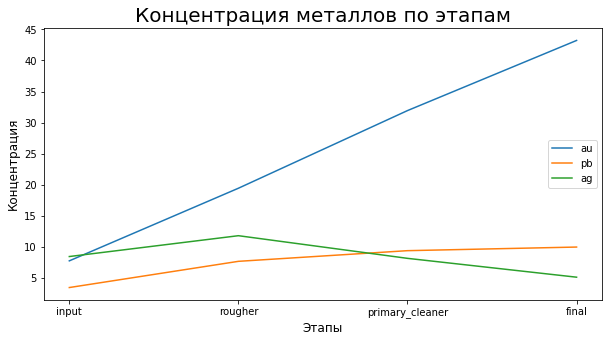

In [26]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(metal_conc['au'], label="au")
ax.plot(metal_conc['pb'], label='pb')
ax.plot(metal_conc['ag'], label="ag")
ax.set_xlabel('Этапы', fontsize=12)
ax.set_ylabel('Концентрация', fontsize=12)
ax.set_title('Концентрация металлов по этапам', fontsize=20)
ax.legend(loc=5);

Исходя из графика, концентрация золота линейно растет на каждом этапе — собственно, это соответствует назначению рассматриваемого процесса. Концентрация свинца также растет, но не так стремительно, как золота. Концентрация серебра, в свою очередь, заметно падает после флотации.

Теперь сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

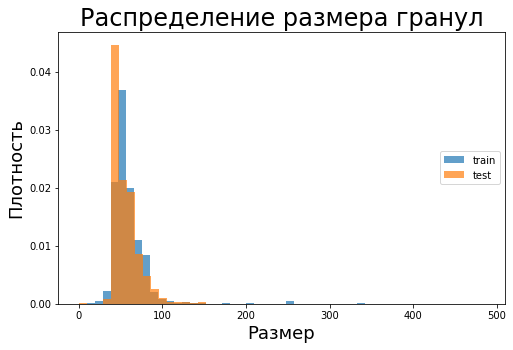

In [27]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(train_data_chosen['rougher.input.feed_size'], label="train", alpha=0.7, density=True, bins=50)
ax.hist(test_data['rougher.input.feed_size'], label='test', alpha=0.7, density=True, bins=50)
ax.set_xlabel('Размер', fontsize=18)
ax.set_ylabel('Плотность', fontsize=18)
ax.set_title('Распределение размера гранул', fontsize=24)
ax.legend(loc=5);

Судя по графику, распределения в обучающей и тестовой выборке примерно похожи — основные значения расположены между 0 и 100. Однако, неплохо бы проверить и основные показатели распределения — схожесть дисперсий и средних значений. Для этого используем тест Лавене и t-test.

In [28]:
levene = st.levene(train_data_chosen['rougher.input.feed_size'], 
                   test_data['rougher.input.feed_size'])
alpha = 0.05
print('p-значение для теста Левене:', levene.pvalue)
if levene.pvalue < alpha:
    print('Гипотеза о равенстве дисперсий не нашла подтверждения')
else:
    print('Отвергнуть гипотезу о равенстве дисперсий не удалось')

p-значение для теста Левене: 0.03630379045776145
Гипотеза о равенстве дисперсий не нашла подтверждения


In [29]:
equal_means = st.ttest_ind(
            train_data_chosen['rougher.input.feed_size'], 
            test_data['rougher.input.feed_size'],
            equal_var = False)

print('p-значение: ', equal_means.pvalue)
if equal_means.pvalue < alpha:
    print('Гипотеза о равенстве средних размеров гранул не нашла подтверждения')
else:
    print('Отвергнуть гипотезу о равенстве средних размеров гранул не удалось')

p-значение:  1.1098088374277613e-29
Гипотеза о равенстве средних размеров гранул не нашла подтверждения


Значит, наши распределения с большой вероятностью не равны. Это, в свою очередь, может повлиять на результаты предсказания модели.

Попробуем исследовать суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [30]:
conc_per_stage = pd.DataFrame(columns=['input', 'rougher', 'primary_cleaner', 'final'])
stages = ['rougher.input.feed', 'rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']

for column,stage in zip(conc_per_stage.columns, stages):
    columns = [col for col in train_data.columns if stage in col and ('ag' in col or 'au' in col or 'pb' not in col)]
    conc_per_stage[column] = train_data[columns].sum(axis=1)
conc_per_stage.describe()

,input,rougher,primary_cleaner,final
count,14328.000000,14328.000000,14328.000000,14328.000000
mean,573.057983,59.533819,49.967830,57.319688
std,132.621899,12.103097,10.373084,9.953261
min,17.371653,0.030000,0.030000,0.030000
25%,510.015750,56.774013,48.237860,56.568008
50%,602.167706,61.406961,51.269117,58.823159
75%,659.904456,65.917737,55.182492,60.906649
max,972.167547,81.079698,68.339958,69.998387


Мы видим, что начиная с этапа флотации концентрация металлов меньше, чем в сырье. Такие значения могут быть вызваны ошибкой оборудования, выгрузки, либо некачественным сырьем — наверняка мы не знаем. Однако удалять эти данные нам не стоит — мы удалили уже много. Попробуем использовать данные в таком виде.

**Вывод**

На данном этапе мы провели анализ данных — посмотрели на то, как меняется концентрация металлов в процессе обработки; сравнили распределения размера гранул сырья; выявили аномалии в данных.

В следующем шаге переходим к обучению модели и получению предсказаний.

## Обучение моделей

### Метрика качества<a id="metrics"></a>

Для решения задачи введём новую метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).

Метрика sMAPE вычисляется так:

![title](https://pictures.s3.yandex.net/resources/smape_1576238825.jpg)

Нужно спрогнозировать сразу две величины:

- эффективность обогащения чернового концентрата rougher.output.recovery;
- эффективность обогащения финального концентрата final.output.recovery.

Итоговая метрика складывается из двух величин:

![title](https://pictures.s3.yandex.net/resources/_smape_1576238814.jpg)

Напишем две функции для вычисления этой метрики:

In [31]:
def sMAPE(target, prediction):
    return np.nansum((abs(target - prediction) / ((abs(target) + abs(prediction))/2))) * 100 / len(target)

sMAPE_scorer = make_scorer(sMAPE, greater_is_better=False) # мы стремимся к уменьшению ошибки

In [32]:
def total_sMAPE(rougher, final):
    return 0.25 * rougher + 0.75 * final

Обучим разные модели и оценим их качество с применением кросс-валидации. Затем выберем лучшую модель и проверим её на тестовой выборке.

In [33]:
scaler = StandardScaler()
scaler.fit(train_data_chosen)
train_scaled = scaler.transform(train_data_chosen)
test_scaled = scaler.transform(test_data)

Начнем с линейной регрессии.

In [34]:
lin_reg = LinearRegression()
lin_sMAPE_rougher = abs(cross_val_score(lin_reg, train_scaled, rougher_recovery_target, 
                                                                                        cv=5, scoring=sMAPE_scorer).mean())
lin_sMAPE_final = abs(cross_val_score(lin_reg, train_scaled, final_recovery_target, 
                                                                                        cv=5, scoring=sMAPE_scorer).mean())
total_lin_sMAPE = total_sMAPE(lin_sMAPE_rougher, lin_sMAPE_final)

total_lin_sMAPE

3.017548306712984

В целом, неплохой результат, и это несмотря на большое количество удаленных данных и некоторое количество аномальных значений. Значит, остальные модели должны справиться еще лучше. Проверим это утверждение и перейдем к решающему дереву.

In [35]:
tree_parameters = {'max_depth':range(1,11)}
tree = DecisionTreeRegressor(random_state=12345)
tree_grid = GridSearchCV(tree, tree_parameters, scoring=sMAPE_scorer, cv=5, verbose=1, iid=False)

tree_rough = tree_grid.fit(train_scaled, rougher_recovery_target)
tree_final = tree_grid.fit(train_scaled, final_recovery_target)

total_tree_sMAPE = total_sMAPE(abs(tree_rough.best_score_), abs(tree_final.best_score_))

total_tree_sMAPE

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   22.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   22.7s finished


1.3368878970508546

Результат получился еще лучше, чем у линейной регрессии, как и ожидалось. Может, случайный лес справится еще лучше? Прорверим.

In [36]:
forest_parameters = {'max_depth':range(1,11), 'n_estimators':range(1,30,5)}
forest = RandomForestRegressor(random_state=12345)
forest_grid = GridSearchCV(forest, forest_parameters, scoring=sMAPE_scorer, cv=2, verbose=1, iid=False)

forest_rough = forest_grid.fit(train_scaled, rougher_recovery_target)
forest_final = forest_grid.fit(train_scaled, final_recovery_target)

total_forest_sMAPE = total_sMAPE(abs(forest_rough.best_score_), abs(forest_final.best_score_))

total_forest_sMAPE

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  4.0min finished


Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  4.5min finished


1.6310481394531213

Всё же, случайный лес справился не так хорошо, как решающее дерево. Тогда воспользуемся именно деревом для проверки на тестовых данных.

In [37]:
predictions_rougher = tree_rough.predict(test_scaled)
predictions_final = tree_final.predict(test_scaled)

sMAPE_rougher = sMAPE(rougher_recovery_target_test.values, predictions_rougher)
sMAPE_final = sMAPE(final_recovery_target_test.values, predictions_final)

total_test_sMAPE = total_sMAPE(sMAPE_rougher, sMAPE_final)

total_test_sMAPE

3.8744400797141645

Результат, полученный на тестовой выборке превышает выведенный на обучаюшей более чем в 2 раза, что может быть связано с разностью распределений выборок. У нас нет информации о том, какой показатель бизнес считает приемлемым, поэтому сложно судить о том, устроит ли он их в таком виде. Можно сравнить этот показатель с результатом константой модели. Возьмем модель, которая предсказывает среднее значение по датасету.

In [38]:
dummy_reg = DummyRegressor()

dummy_rougher = dummy_reg.fit(train_scaled, rougher_recovery_target)
dummy_final = dummy_reg.fit(train_scaled, final_recovery_target)

predictions_rougher_dummy = dummy_rougher.predict(test_scaled)
predictions_final_dummy = dummy_final.predict(test_scaled)

sMAPE_rougher_dummy = sMAPE(rougher_recovery_target_test.values, predictions_rougher_dummy)
sMAPE_final_dummy = sMAPE(final_recovery_target_test.values, predictions_final_dummy)

total_sMAPE_dummy = total_sMAPE(sMAPE_rougher_dummy, sMAPE_final_dummy)

total_sMAPE_dummy

4.119790573750282

Константная модель показала результат лишь немногим хуже, чем дерево решений. Это может означать, что проверенные нами алгоритмы не слишком эффективны для настоящего набора данных, и нам стоит проверить друге, либо усложнить использованные. Также можно дополнительно поработать с обработкой данных и подумать над корректностью используемой метрики.